# Deviation Survey Workflow

In [1]:
# ONLY RUN ONCE, must restart notebook otherwise
import pandas as pd
import os
from pathlib import Path
#get parent directory and access src for the classes
# TODO: Find better way to do this
path = Path().resolve().parent
path = path/'src'

#change directory to get src class data
os.chdir(path)
from dataclass import *
from directional_survey import *

#get back to root path
path = Path().resolve().parent

In [2]:
# load data
file = path/'data/wellbore_survey_IHS.csv'

df = pd.read_csv(file, sep=',')


df.rename(columns={'UWI':'wellId',
                   'Measured Depth':'md',
                   'Deviation Angle':'inc',
                   'Deviation Azimuth':'azim',
                   'TV Depth':'tvd',
                   'Deviation N/S':'n_s_deviation',
                   'N/S':'n_s',
                   'Deviation E/W':'e_w_deviation',
                   'E/W':'e_w',
                   'Surface Latitude':'surface_latitude',
                   'Surface Longitude':'surface_longitude',
                   'BH Latitude':'btm_latitude',
                   'BH Longitude':'btm_longitude',},inplace=True)

df.tail()

,wellId,md,tvd,inc,azim,n_s_deviation,n_s,e_w_deviation,e_w,PRODFit Formation Code,PRODFit Formation Name,Point Type Code,Point Type Name,surface_latitude,surface_longitude,btm_latitude,btm_longitude
155,well_d,11017,8376.42,91.7,299.9,1441.98,N,2499.79,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
156,well_d,11049,8375.39,92.0,299.6,1457.85,N,2527.56,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
157,well_d,11081,8374.66,90.6,299.5,1473.63,N,2555.39,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
158,well_d,11106,8374.44,90.4,299.3,1485.90,N,2577.17,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
159,well_d,11160,8374.07,90.4,299.3,1512.32,N,2624.26,W,NaN,NaN,PE,"PROJECTED, END POINT",33.473325,-97.475159,33.477481,-97.483764


In [3]:
# create dataframe of interest


my_df = df
#my_df = df[['wellId','md','inc','azim','surface_latitude', 'surface_longitude']]
my_df.tail()

,wellId,md,tvd,inc,azim,n_s_deviation,n_s,e_w_deviation,e_w,PRODFit Formation Code,PRODFit Formation Name,Point Type Code,Point Type Name,surface_latitude,surface_longitude,btm_latitude,btm_longitude
155,well_d,11017,8376.42,91.7,299.9,1441.98,N,2499.79,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
156,well_d,11049,8375.39,92.0,299.6,1457.85,N,2527.56,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
157,well_d,11081,8374.66,90.6,299.5,1473.63,N,2555.39,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
158,well_d,11106,8374.44,90.4,299.3,1485.90,N,2577.17,W,NaN,NaN,NaN,NaN,33.473325,-97.475159,33.477481,-97.483764
159,well_d,11160,8374.07,90.4,299.3,1512.32,N,2624.26,W,NaN,NaN,PE,"PROJECTED, END POINT",33.473325,-97.475159,33.477481,-97.483764


In [4]:
# create survey obj

survey_dict = my_df.to_dict(orient='records')
survey_obj = Survey(survey_dict)

In [5]:
# gen lat lon survey

#my_survey_lat_lon = survey_obj.get_lat_lon_from_deviation()
#my_survey_lat_lon.tail()

In [6]:
# import matplotlib.pyplot as plt
# plt.scatter(x=my_survey_lat_lon['longitude_points'], y=my_survey_lat_lon['latitude_points'])
# plt.show()

# Convert with only MD, INCL, AZIM, Surface lat lon

use Minimum Curvature Algo

In [7]:
my_df = df
my_df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
my_df.tail()

,wellId,md,inc,azim,surface_latitude,surface_longitude
155,well_d,11017,91.7,299.9,33.473325,-97.475159
156,well_d,11049,92.0,299.6,33.473325,-97.475159
157,well_d,11081,90.6,299.5,33.473325,-97.475159
158,well_d,11106,90.4,299.3,33.473325,-97.475159
159,well_d,11160,90.4,299.3,33.473325,-97.475159


In [8]:
survey_dict = my_df.to_dict(orient='records')
survey_obj = Survey(survey_dict)

In [9]:
df_min_curve = survey_obj.minimum_curvature_algo()
df_min_curve.tail()

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long


,wellId,md,inc,azim,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
155,well_d,11017,91.7,299.9,-2499.763906,1442.009376,1.330008,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640923.566321,3.705241e+06,33.477388,-97.483287
156,well_d,11049,92.0,299.6,-2527.531684,1457.880059,1.325480,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640915.102702,3.705246e+06,33.477433,-97.483377
157,well_d,11081,90.6,299.5,-2555.361412,1473.657511,4.386144,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640906.620201,3.705251e+06,33.477478,-97.483467
158,well_d,11106,90.4,299.3,-2577.140878,1485.929673,1.131350,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640899.981820,3.705255e+06,33.477512,-97.483538
159,well_d,11160,90.4,299.3,-2624.231412,1512.355787,0.000000,33.473325,-97.475159,641685.494359,3.704802e+06,14,S,640885.628625,3.705263e+06,33.477587,-97.483691


In [11]:
min(df_min_curve['latitude_points'])

33.47324239217407

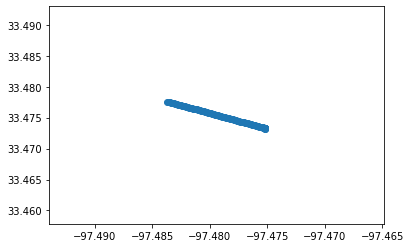

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x=df_min_curve['longitude_points'], y=df_min_curve['latitude_points'])

plt.show()

In [13]:
Path.cwd()

WindowsPath('C:/Users/BpAmos/Documents/repos/directional-survey-converter/src')

# TESTING

In [14]:

#Minimual Curvature Algo Testing

# # load data
file = path/'data/wellbore_survey_2.csv'

df = pd.read_csv(file, sep=',')

df.rename(columns={'wellId':'wellId',
                   'MD':'md',
                   'Inclination':'inc',
                   'Azimuth':'azim',
                   'TVD':'tvd',
                   'North':'n_s_deviation',
                   'East':'e_w_deviation',
                   'surface_latitude':'surface_latitude',
                   'surface_longitude':'surface_longitude',},inplace=True)

df_latlon_orig = df[['latitude_decimal_deg','longitude_decimal_deg']]

df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
survey_dict = df.to_dict(orient='records')
survey_obj = Survey(survey_dict)
df_min_curve = survey_obj.minimum_curvature_algo()

df_test = pd.merge(df_min_curve,df_latlon_orig,left_index=True,right_index=True)

def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return float('inf')

lat_test_list = list(zip(df_test['latitude_points'], df_test['latitude_decimal_deg']))

max_lat_delta = max([get_change(row[0],row[1]) for row in lat_test_list])

# tolerance test
# if the highest delta from the actual lat points is less than 0.01% the survey passes
if max_lat_delta <= 0.0001:
    print('latitude pass')
else:
    print('fail')

lon_test_list = list(zip(df_test['longitude_points'], df_test['longitude_decimal_deg']))

max_lon_delta = max([get_change(row[0],row[1]) for row in lon_test_list])

# tolerance test
# if the highest delta from the actual lon points is less than 0.01% the survey passes
if max_lon_delta <= 0.0001:
    print('longitute pass')
else:
    print('fail')

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long
latitude pass
longitute pass


In [15]:
round(max_lon_delta*10000)

#0.0001*100000

0

In [24]:
# df_latlon_orig.rename(columns={'latitude_decimal_deg':'latitude_points',
#                               'longitude_decimal_deg':'longitude_points'},inplace=True)
# df_latlon_orig['wellId'] = 'well_B'
# df_latlon_orig['color'] = 'blue'

# df_min_curve['color'] = 'red'

# df_min_curve[['wellId','latitude_points','longitude_points']]
# df_test = df_min_curve.append(df_latlon_orig)
# df_test

In [5]:
def read_data(path_file):
    
    file = path_file
    
    df = pd.read_csv(file, sep=',')
    
    survey_dict = df.to_dict(orient='records')
    
    return survey_dict

In [21]:
file = Path.cwd()/'data/wellbore_survey_3.csv'
my_data = read_data(file)



my_data[0]


{'wellId': 'well_C',
 'md': 0.0,
 'inc': 0.0,
 'azim': 227.11,
 'tvd': 0.0,
 'TVD from Fld Ref': -118.0,
 'n_s_deviaition': 0.0,
 'e_w_deviation': 0.0,
 'Grid East': 769516.0,
 'Grid North': 3300805.0,
 'DLS': 0.0,
 'Toolface': 0.0,
 'Build Rate': 0.0,
 'Turn  Rate': 0.0,
 'Vert   Sect': 0.0,
 'Major Semi': 0.0,
 'Minor Semi': 0.0,
 'Vert  Semi': 0.0,
 'Minor Azim': 0.0,
 'surface_latitude': 29.80829444,
 'surface_longitude': 47.78852083,
 'latitude_decimal_deg': 29.80829444,
 'longitude_decimal_deg': 47.78852083}

In [5]:
# # load data
file = Path.cwd()/'data/wellbore_survey_2.csv'

df = pd.read_csv(file, sep=',')

df.rename(columns={'wellId':'wellId',
                   'MD':'md',
                   'Inclination':'inc',
                   'Azimuth':'azim',
                   'TVD':'tvd',
                   'North':'n_s_deviation',
                   'East':'e_w_deviation',
                   'surface_latitude':'surface_latitude',
                   'surface_longitude':'surface_longitude',},inplace=True)

df_latlon_orig = df[['latitude_decimal_deg','longitude_decimal_deg']]

df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
survey_dict = df.to_dict(orient='records')
survey_obj = Survey(survey_dict)
df_min_curve = survey_obj.minimum_curvature_algo()
df_min_curve

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long


,wellId,md,inc,azim,e_w_deviation,n_s_deviation,dls,surface_latitude,surface_longitude,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
0,well_C,0.00,0.00,227.11,0.000000,0.000000,0.000000,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769516.003687,3.300805e+06,29.808294,47.788524
1,well_C,35.00,0.00,227.11,0.000000,0.000000,0.000000,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769516.003687,3.300805e+06,29.808294,47.788524
2,well_C,774.81,0.46,227.11,-2.175842,-2.021203,0.062178,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769515.340490,3.300804e+06,29.808289,47.788517
3,well_C,800.00,0.13,163.86,-2.241984,-2.117474,1.659124,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769515.320330,3.300804e+06,29.808289,47.788517
4,well_C,900.00,0.57,230.43,-2.593879,-2.543313,0.531857,29.808294,47.788521,769516.003687,3.300805e+06,38,R,769515.213073,3.300804e+06,29.808288,47.788516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,well_C,10613.00,89.88,27.59,2408.197098,2537.080931,1.760414,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770250.022162,3.301578e+06,29.815105,47.796305
106,well_C,10707.00,90.00,26.69,2451.076273,2620.730090,0.965920,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770263.091735,3.301604e+06,29.815331,47.796447
107,well_C,10802.00,89.72,26.72,2493.768830,2705.596300,0.296424,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770276.104426,3.301630e+06,29.815562,47.796588
108,well_C,10851.00,90.06,27.04,2515.922784,2749.301908,0.952866,29.808294,47.788521,769516.003687,3.300805e+06,38,R,770282.856951,3.301643e+06,29.815680,47.796661


In [22]:
# UNIT TEST

In [20]:
# Unit tests

import unittest

class TestMinCurve(unittest.TestCase):
    
    def test_survey_obj_data(self):
        
        file = Path.cwd()/'data/wellbore_survey_3.csv'

        df = pd.read_csv(file, sep=',')

        df_latlon_orig = df[['latitude_decimal_deg','longitude_decimal_deg']]
        df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
        
        survey_dict = df.to_dict(orient='records')
        survey_obj = Survey(survey_dict)
        self.assertEqual(len(survey_obj.directional_survey_points.wellId),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.md),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.inc),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.azim),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.surface_latitude),110,'incorrect')
        self.assertEqual(len(survey_obj.directional_survey_points.surface_longitude),110,'incorrect')
        

    def test_lat_long_calculation(self):
        
        
        file = Path.cwd()/'data/wellbore_survey_3.csv'

        df = pd.read_csv(file, sep=',')

        df = df[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
        survey_dict = df.to_dict(orient='records')
        
        # get survey obj
        survey_obj = Survey(survey_dict)
        
        # run min curve algo
        df_min_curve = survey_obj.minimum_curvature_algo()

        df_test = pd.merge(df_min_curve,df_latlon_orig,left_index=True,right_index=True)

        def get_change(current, previous):
            # get abs change, else 0
            if current == previous:
                return 0
            try:
                return (abs(current - previous) / previous) * 100.0
            except ZeroDivisionError:
                return float('inf')

        #lat test
        lat_test_list = list(zip(df_test['latitude_points'], df_test['latitude_decimal_deg']))
        # get abs change
        max_lat_delta = max([get_change(row[0],row[1]) for row in lat_test_list])
        
        #lon test
        lon_test_list = list(zip(df_test['longitude_points'], df_test['longitude_decimal_deg']))
        # get abs change
        max_lon_delta = max([get_change(row[0],row[1]) for row in lon_test_list])
        
        # tolerance test
        # if the highest delta from the actual lat or lon points is less than 0.01% the survey passes
        self.assertEqual(round(max_lat_delta*10000),0,'latitude calculation not within 0.001%')    
        self.assertEqual(round(max_lon_delta*10000),0,'longitude calculation not within 0.001%')
        
        
tests = TestMinCurve()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

..

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long



----------------------------------------------------------------------
Ran 2 tests in 0.121s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>